1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [25]:
# Стандартизация
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [28]:
X_st = X.copy().astype(np.float64)
X_st

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [32]:
X_st = X.copy().astype(np.float64)
for n in range(1, X.shape[0]):
    X_st[n] = calc_std_fit(X[n])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [33]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [34]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [69]:
l = 1e-4
Ws = np.empty([0, 4])
ls = []
while True:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    Ws = np.vstack([Ws, W])
    ls.append(l)
    print(W)
    print(l)
    l += 1e-1
    if l > 1e+1:
        break

[56.49717514  6.30231751 -0.35424091  6.56978425]
0.0001
[53.80696157  5.73014164  0.98457017  5.51539253]
0.10010000000000001
[51.36130176  5.35410346  1.64121711  4.98033235]
0.2001
[49.12829877  5.07326667  2.01860783  4.6482347 ]
0.30010000000000003
[47.08137161  4.84862124  2.25439165  4.41505514]
0.4001
[45.19819207  4.66101363  2.40866292  4.23718003]
0.5001
[43.45986693  4.49962629  2.51192465  4.09334562]
0.6001
[41.85030184  4.35776278  2.5813327   3.9720377 ]
0.7001
[40.35570158  4.23099941  2.62728187  3.86651478]
0.8000999999999999
[38.96417365  4.11626772  2.65643608  3.77258113]
0.9000999999999999
[37.66541115  4.0113563   2.67326032  3.68749303]
1.0001
[36.45043708  3.91462121  2.68085409  3.60938064]
1.1001
[35.31139652  3.82480846  2.68143211  3.53692414]
1.2001000000000002
[34.24138662  3.74094037  2.67661529  3.46916308]
1.3001000000000003
[33.23431664  3.6622402   2.66761406  3.40537959]
1.4001000000000003
[32.28479186  3.58808061  2.65534788  3.34502417]
1.5001000

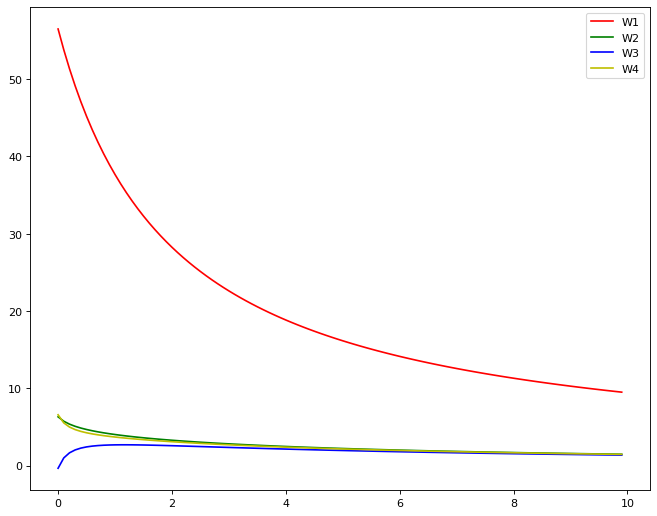

In [80]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

for n in range(4):
    plt.plot(ls, Ws.transpose()[n], color='rgby'[n])
plt.legend(['W1', 'W2', 'W3', 'W4'])

Не уверен, что правильно понял задачу ))
Но - вот график зависимости 4 весов от лямбды Р2 регуляризации

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но по-видимому бессмысленно, и тот и другой метод предполагает масштабирование признаков. Нормализация в диапазон 0-1, стандартизация - в -1 +1 со срнединим в 0.. что вобщем для метематики данных методов - одинаково подходит.

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.